In [1]:
%matplotlib inline
import sys
sys.path.append('../modeling')
from config import TRACKING_URI
import mlflow

# set the experiment id
mlflow.set_tracking_uri(TRACKING_URI)
mlflow.set_experiment(experiment_name='model_pipeline')
mlflow.autolog()

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/synth_combined.csv', index_col=0)
col_target = 'dropped_out'
X = df.drop(col_target, axis=1)
# MLFlow doesn't like a series for the target, so convert it to numpy - for sklearn it doesn't matter
y = df[col_target].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

2025/06/04 13:21:08 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 41718
max_resources_: 1126400
aggressive_elimination: True
factor: 3
----------
iter: 0
n_candidates: 75
n_resources: 41718
Fitting 5 folds for each of 75 candidates, totalling 375 fits
----------
iter: 1
n_candidates: 25
n_resources: 125154
Fitting 5 folds for each of 25 candidates, totalling 125 fits
----------
iter: 2
n_candidates: 9
n_resources: 375462
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 3
n_candidates: 3
n_resources: 1126386
Fitting 5 folds for each of 3 candidates, totalling 15 fits


2025/06/04 13:26:11 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/boesi/Projekte/neue-fische/FinApprenticeship/.venv/lib/python3.13/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/06/04 13:26:45 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/boesi/

🏃 View run legendary-squid-601 at: http://mlflow.fa.berufsnavigator.de/#/experiments/783766249587513434/runs/efda52b30e804f259b2f19e143f217c3
🧪 View experiment at: http://mlflow.fa.berufsnavigator.de/#/experiments/783766249587513434


2025/06/04 13:26:57 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/boesi/Projekte/neue-fische/FinApprenticeship/.venv/lib/python3.13/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/06/04 13:27:26 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/boesi/

HalvingGridSearchCV(aggressive_elimination=True,
                    estimator=Pipeline(steps=[('enc_onehot',
                                               OneHotEncoder(drop='first')),
                                              ('model_logreg',
                                               LogisticRegression())]),
                    n_jobs=-1,
                    param_grid=[{'model_logreg__C': [0.6, 0.8, 1.0, 10, 100],
                                 'model_logreg__l1_ratio': [0.1, 0.25, 0.5,
                                                            0.75, 0.9],
                                 'model_logreg__max_iter': [200, 500, 1000],
                                 'model_logreg__penalty': ['elasticnet'],
                                 'model_logreg__solver': ['saga']}],
                    scoring='f1', verbose=1)

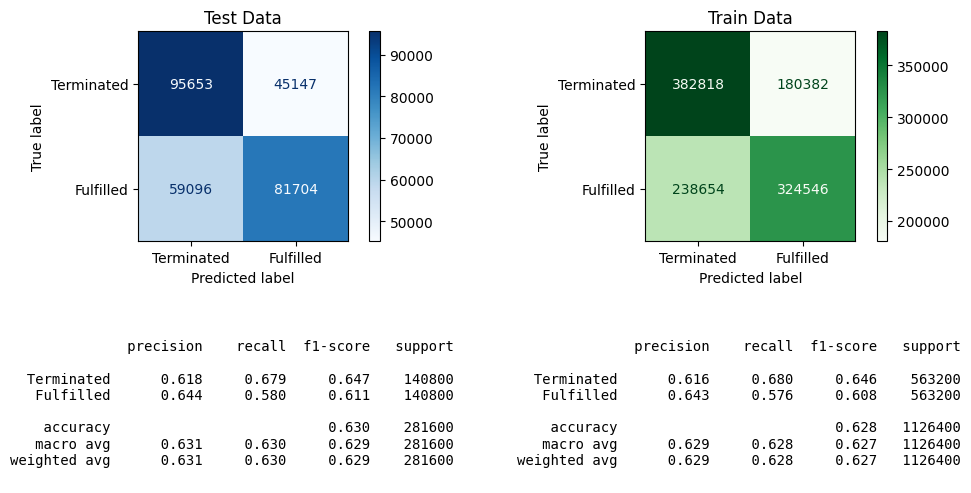

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.pipeline import Pipeline
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

param_default = [{
    'C': [1.0],
    'class_weight': [None],
    'dual': [False],
    'fit_intercept': [True],
    'intercept_scaling': [1],
    'l1_ratio': [None],
    'max_iter': [100],
    'multi_class': ['deprecated'],
    'penalty': ['l2'],
    'random_state': [None],
    'solver': ['lbfgs'],
    'tol': [0.0001],
    'warm_start': [False]
}]

param1 = [{
    'model_logreg__penalty': ['l2', 'l1'],
    'model_logreg__C': [0.01, 0.1, 1, 10],
    'model_logreg__solver': ['saga'],
    'model_logreg__max_iter': [200, 500]
}]

param2 = [{
    'model_logreg__penalty': ['l2'],
    'model_logreg__C': [0.01, 0.1, 1, 10],
    'model_logreg__solver': ['sag', 'lbfgs', 'newton-cg', 'newton-cholesky'],
    'model_logreg__max_iter': [200, 500]
}]

param3 = [{
    'model_logreg__penalty': ['elasticnet'],
    'model_logreg__C': [0.6, 0.8, 1.0, 10, 100],
    'model_logreg__l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9],
    'model_logreg__solver': ['saga'],
    'model_logreg__max_iter': [200, 500, 1000]
}]


pipe = Pipeline([
    ('enc_onehot', OneHotEncoder(drop='first')),
    ('model_logreg', LogisticRegression())
])

with mlflow.start_run() as parent_run:
    model = HalvingGridSearchCV(pipe, param3, cv=5, aggressive_elimination=True, scoring='f1', verbose=1, n_jobs=-1)
    model.fit(X_train, y_train)
    mlflow.log_params(model.best_params_)
    mlflow.log_metric('best_f1_score', model.best_score_)

from utils import check_classification_binary
check_classification_binary(model, X_train, X_test, y_train, y_test)
model